<a href="https://colab.research.google.com/github/LosPowerPeralta/ADA-Informes-Matias/blob/main/Informe_Algoritmo_Corte_De_Varilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema del Corte de Varilla

Este problema consiste en como conseguir el valor de coste máximo a la hora de vender una varilla por partes.

Este tipo de problemas son dificiles de trabajar gracias a la complejidad que estos tienen, a pesar de todo ha habido gente que los ha intentado resolver consiguiendo algoritmo con una complejidad de $O(2^n)$ lo cual toma mucho tiempo si es que queremos conseguir el valor máximo para varillas demasiado largas. Por esta misma razón se ha decidido cambiar la forma de ver las cosas, osea realizar un cambio de paradigma el cual es conocido como la programación dinámica.

Este tipo de programación consiste en reducir el tiempo de un algoritmo mediante utilización de estructuras óptimas las cuales irán almacenando información para no realizar calculos de más o nos ayudarán a encontrar el camino más corto hacia nuesto objetivo. Por esta misma razón resolveremos este problema con este nuevo paradigma.

Entrada: Recibe una secuenca de $n$ números $[a_1,a_2,...,a_n]$ el cual contiene el precio de cada largo de la varilla.

Salida: Retorna del valor máximo en la que se puede vender la varilla al ser cortada o no.

#2. Corte de varilla (Recursivo)
##2.1 Descripción del Algoritmo

Este algoritmo es una de las formas en las que se puede resolver este problema, a pesar de no ser la más optima por su complejidad $O(n^2)$ logrará obtener los resultados que deseamos.

Lo primero que realiza este algoritmo es definir un $maxValue$ como el primer valor dentro de nuestra lista de precios y luego empieza a recorrer esta lista para llegar al valor máximo de nuestro problema. Para realizar esta acción el algoritmo explora cada combinación que se puede econtrar, por ejemplo, si tenemos un arreglo de largo 4, el primer corte que se podría realizar vendría siendo de 3, 2, 1 o directamente no realizar ninguno, luego el algortimo seguirá viendo cuantos cortes se podrían llegar a realizar a partir de los enviados de forma recurisva.

Al realizar esta acción iremos calculando valores que ya fueron vistos en otras llamadas recurisvas de nuestra función lo cual provoca que hagamos calculos innecesarios y la complejidad de nuestro algoritmo aumente.

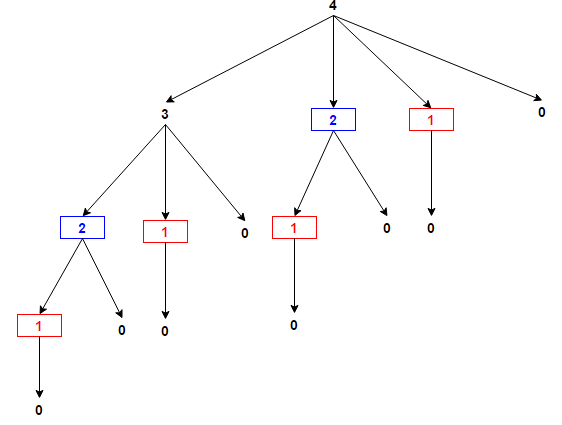

##2.2 Código del algoritmo recursivo

In [2]:
import random as rd
import matplotlib.pyplot as plt
import datetime
from sys import maxsize
from copy import deepcopy
import math as mt
from timeit import repeat
from termcolor import colored

In [3]:
def corteDeVarillaRecursivo(precio, n, recursiones = 0, solucion = [], verbose = False):
    if verbose:
        print("Función corteDeVarillaRecursivo()")
        print("Entrada: ")
        print("Precio: ", precio)
        print("Posibles cortes: ", solucion)
        print("")

    if (n == 0): #Caso base
        if verbose:
            print("")
            print("Salida")
            print("Precio máximo: ", 0)
            print("Posbles cortes: ", solucion)
        return 0, solucion, recursiones

    maxValue = -maxsize #Se rocoge el menor valor que puede almacenar la variable
    for i in range(1, n + 1):
        soluciones = solucion.copy() 
        soluciones.append(i) #Se almacenan todas las formas de cortar la varilla

        if verbose:
            print("Se inicializan las posibles soluciones: ", soluciones)
            print("")
            print("Se realiza una llamada recursiva a la función")
            print("")

        recursiones += 1
        costo, cortes, recursiones = corteDeVarillaRecursivo(precio, n - i, recursiones, soluciones, verbose);

        #Se verifica si el costo calculado a traves de todas las posibles soluciones es mayor al valor maximo calculado
        if verbose:
            print(costo + precio[i - 1], ">", maxValue)

        if costo + precio[i - 1] > maxValue:
            maxValue = costo + precio[i - 1]
            posiblesCortes = cortes.copy()

    solucion = posiblesCortes.copy()
    if verbose:
        print("")
        print("Salida de la función")

    return maxValue, solucion, recursiones

##2.3 Descripción algortimo con programación Dinamica

Este algoritmo viene siendo la mejor forma de poder resolver nuestro problema, ya que al igual que en el algoritmo recursivo, iremos calculando cada combinación que nos iremos encontrando, la difenrencia de este con el anterior es que el algoritmo con programación dinámica utiliza como estructura óptima una lista en la cual se irán almacenando los valores que ya han sido calculados anteriormente, de este forma no tendrémos que realizar los mismo calculos una y otra vez en cada llamada de nuestra función lo cual ayudará a que disminuya en gran medida nuestra complejidad.

Como se puede apreciar en el siguiente código, lo primero que realiza nuestro algoritmo es generar un arreglo auxiliar de largo $n + 1$ el cual irá almacenando todos los posibles valores que pueden tomar nuestros cortes, y por último empieza a recorrer el arreglo con los precios recibidos.

El primer ciclo el cual depende de $i$ irá iterando en todos los posibles largos de nuestra varilla y el segundo ciclo irá iternado en todos los posibles cortes que se le pueden hacer a la varilla de largo $i$ para luego almacenar el valor máximo en la última posición de nuestro arreglo de ganancias.

Una desventaja que tiene este algorimo en comparación al algoritmo recursivo es que este necesita de una estructura auxiliar la cual irá almacenando las ganancias lo cual provoca que tenga una complejidad espacial de $O(n)$.

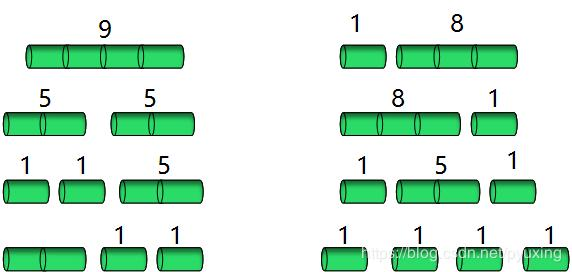

#2.4 Código del algoritmo con programación dinámica

In [12]:
def corteDeVarillaDinamico(precio, n, comparaciones = 0, cont = 0, verbose = False):
    if verbose:
        print("Funcion corteDeVarillaDinamico()")
        print("Entrada:")
        print("Precios:", precio)
        print("")
        print("Se inicalizan dos arreglos, uno que almacena las")
        print("posibles ganancias y otro que almacena las posibles")
        print("soluciones")

    #Se inicializan los arreglos con el mismo largo que los precios
    ganancias = [0] * (n + 1)
    soluciones = [0] * (n + 1)

    if verbose:
        print("")
        print("Se busca la ganancia máxima")

    valorMax = -maxsize #Se inicializa variable con el valor minimo soportado

    #Se recorre la lista para verificar todos los posibles cortes
    #y con ayuda de una estructura optima para los resultados previamente
    #calculados.
    for i in range(1, n + 1):
        for j in range(1, i + 1):
            comparaciones += 1

            if verbose:
                print(valorMax, "<", precio[j] + ganancias[i - j])
                
            if valorMax < precio[j] + ganancias[i - j]:
                valorMax = precio[j] + ganancias[i - j]
                soluciones[i] = j
                if verbose:
                    print("Posible corte:", j)
        ganancias[i] = valorMax
        cont += 1
    
    solucion = []
    auxN = n
    if verbose:
        print("")
        print("Se buscan los cortes más optimos")
    
    #Ciclo para buscar los cortes más optimos de la varilla
    while auxN > 0:
        if verbose:
            print("Corte optimo:", soluciones[auxN])
        solucion.append(soluciones[auxN])
        auxN = auxN - soluciones[auxN]

    if verbose:
        print("Salida de la función")
    return ganancias[n], solucion, cont, comparaciones

#3. Ejecución paso a paso

##3.1. Algoritmo recursivo (Verbose = True)

In [5]:
import random

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

A = cutrod_instance_generator(5)
print(A)

[4, 12, 12, 15, 17]


In [6]:
ganancia, solucion, recursiones = corteDeVarillaRecursivo(A, len(A), verbose= True)

print("")
print("Ganacia máxima =", ganancia)
print("Cortes =", solucion)
print("Cantidad de recursiones = ", recursiones)

Función corteDeVarillaRecursivo()
Entrada: 
Precio:  [4, 12, 12, 15, 17]
Posibles cortes:  []

Se inicializan las posibles soluciones:  [1]

Se realiza una llamada recursiva a la función

Función corteDeVarillaRecursivo()
Entrada: 
Precio:  [4, 12, 12, 15, 17]
Posibles cortes:  [1]

Se inicializan las posibles soluciones:  [1, 1]

Se realiza una llamada recursiva a la función

Función corteDeVarillaRecursivo()
Entrada: 
Precio:  [4, 12, 12, 15, 17]
Posibles cortes:  [1, 1]

Se inicializan las posibles soluciones:  [1, 1, 1]

Se realiza una llamada recursiva a la función

Función corteDeVarillaRecursivo()
Entrada: 
Precio:  [4, 12, 12, 15, 17]
Posibles cortes:  [1, 1, 1]

Se inicializan las posibles soluciones:  [1, 1, 1, 1]

Se realiza una llamada recursiva a la función

Función corteDeVarillaRecursivo()
Entrada: 
Precio:  [4, 12, 12, 15, 17]
Posibles cortes:  [1, 1, 1, 1]

Se inicializan las posibles soluciones:  [1, 1, 1, 1, 1]

Se realiza una llamada recursiva a la función

Función 

##3.2. Algoritmo con programación dinámica (Verbose = True)

In [7]:
ganancia, solucion, cantProblemas, comparaciones = corteDeVarillaDinamico(A, len(A) - 1, verbose= True)

print("")
print("Ganancia máxima =", ganancia)
print("Cortes =", solucion)
print("Cantidad de subproblemas resueltos =", cantProblemas)
print("Cantida de comparaciones =", comparaciones)

Funcion corteDeVarillaDinamico()
Entrada:
Precios: [4, 12, 12, 15, 17]

Se inicalizan dos arreglos, uno que almacena las
posibles ganancias y otro que almacena las posibles
soluciones

Se busca la ganancia máxima
-9223372036854775807 < 12
Posible corte: 1
12 < 24
Posible corte: 1
24 < 12
24 < 36
Posible corte: 1
36 < 24
36 < 15
36 < 48
Posible corte: 1
48 < 36
48 < 27
48 < 17

Se buscan los cortes más optimos
Corte optimo: 1
Corte optimo: 1
Corte optimo: 1
Corte optimo: 1
Salida de la función

Ganancia máxima = 48
Cortes = [1, 1, 1, 1]
Cantidad de subproblemas resueltos = 4
Cantida de comparaciones = 10


## **4. Correctitud del algoritmo de Corte de varilla con Bottom-up**

### **Teorema**
*El algoritmo **Bottom_Up_CutRod** en cada iteración retorna el máximo beneficio posible para vender la varilla de largo $n$.*

#### **Por inducción matemática**

##### **Caso base:** Cuando la varilla es de largo $n = 0$, entonces su valor debe ser $0$, puesto que se puede inferir que con longitud $0$ "no existe varilla la cual vender".

##### **Paso inductivo:**
Cuando la varilla es de un largo $n$, con $n$ entre $1$ y el máximo largo al que podremos vender una varilla, entonces obtendremos el máximo beneficio posible a partir de la instrucción.
> $r(n) = max(p(i)+r(n-i),p(n))$

Donde podremos identificar 2 posibles casos:


1.   Cuando es mayor $p(n)$ significa que el máximo beneficio posible para vender la varilla de largo $n$ será el valor de la misma, $r(n) = p(n)$

2.   Cuando es mayor $p(i) + r(n-i)$ significa que el máximo beneficio posible se obtiene cortando la varilla, vendiendo el primer trozo y calculando la máxima ganancia para el trozo restante, $r(n) = p(i) + r(n-i)$. El beneficio máximo para una varilla de largo $n-i$ fue resuelto en iteraciones anteriores, por lo que siempre retornará la mayor ganacia para un subproblema $r(n-i)$.


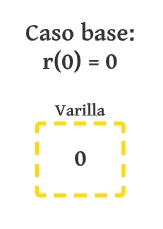

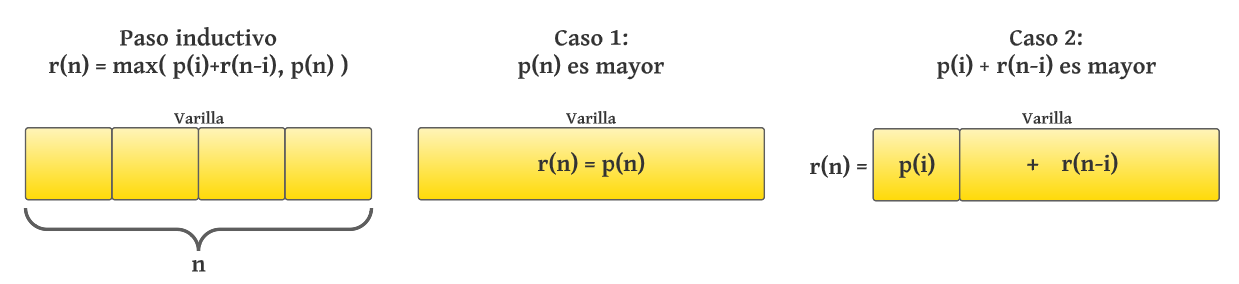

## **5. Tiempo de ejecución**

#### **Teorema**
*El algoritmo **CutRod** tiene un tiempo de ejecución $O(2^n)$.*

#### **Función recursiva**
Se define una función recursiva que modele la división del problema original $T(n)$:
>$T(n) = ∑_{j=0}^{n-1}T(j) + 1$

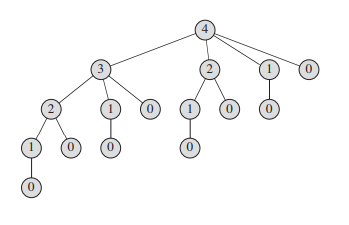

#### **Método de sustitución**
Ahora, usando el método de sustitución, probaremos que $O(2^n)$ es efectivamente una cota superior asintótica para $T(n)$.

Debemos probar que $T(n) \leq c · 2^n$, para algún valor de $c>0$.
Para ello, asumimos que esto es cierto (inducción) y **sustituimos en la recursión**, los valores de $T(n)$ por $c · 2^n$:

>$T(n) \leq ∑_{j=0}^{n-1}c · 2^j + 1 \leq c · 2^n$
>
>$T(n) \leq c · (2^n-1) + 1 \leq c · 2^n$
>
>$T(n) \leq c · 2^n - c + 1 \leq c · 2^n$
>
>$-c \leq -1$
>
>$c ≥ 1$ 

Por lo que efectivamente $c⋅2^n=O(2^n)$ es una cota asintótica superior para el algoritmo.

#### **Teorema**
*El algoritmo **Bottom_Up_CutRod** tiene un tiempo de ejecución $O(n^2)$.*

Para calcular el tiempo de ejecución del algoritmo se utilizará la siguiente fórmula obtenida del libro Algorithms Illuminated (Parte 4, página 107):

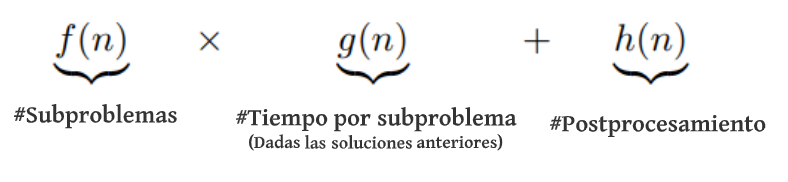

Entonces para obtener el tiempo de ejecución del algoritmo $T(n)$, primeramente debemos calcular las 3 funciones anteriores:

1.   $f(n)$: Se refiere a la cantidad de subproblemas en resolver. Para una varilla de largo $n$, resulta en una cantidad de $n$ subproblemas.

2.   $g(n)$: Se refiere al tiempo estimado por resolver cada subproblema, este varía en función del tamaño de varilla del subproblema actual a resolver. Se calcula como la cantidad de soluciones anteriores al subproblema actual de largo $j$.

3.   $h(n)$: Se refiere al tiempo de ejecución en procesar la solución. En este caso es despreciable el valor de esta función, ya que buscamos una cota superior para el algoritmo y lo calculado es de orden $O(1)$ en instrucciones para almacenar la solución dinámicamente.

Reemplazando obtendremos:
>$T(n) = \sum_{j=1}^{n}\sum_{i=1}^{j}·c$
>
>$T(n) = c·\sum_{j=1}^{n}j$
>
>$T(n) = c·\frac{n(n+1)}{2}$
>
>$T(n) = c·(\frac{n^2}{2}+\frac{n}{2})$
>
>$T(n) = O(n^2)$


#### **Complejidad espacial**
*El algoritmo **Bottom_Up_CutRod** tiene una complejidad espacial $O(n)$.*

Se obtiene el orden $O(n)$ en base a la cantidad de subproblemas anteriores utilizados para resolver el subproblema actual. Representación de subproblemas resueltos y los subproblemas anteriores utilizados para la solución:

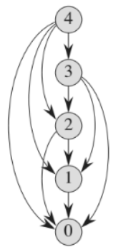

Para el ejemplo anterior, con un largo de varilla igual a 4, solo se necesito almacenar los problemas anteriores a este, los cuales son 4-1, además para retornar la solución final al problema se necesita almacenar un subproblema más, el del 4. En términos generales, para resolver cualquier problema $n$ es necesario almacenar $n-1$ soluciones anteriores y para retornar la solución actual $n-1+1$, lo que da un total de $n$ subproblemas, por este motivo la cantidad de memoria requerida es de orden $O(n)$.

## **6. Experimentos**

### **6.1. Tiempo de ejecución CutRod v/s Bottom_Up_CutRod**

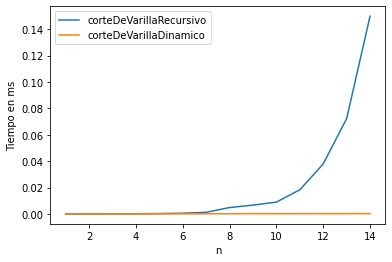

In [8]:
x=[]
y_Dynamic = []
y_NoDynamic = []

for n in range(1,15):
  a = cutrod_instance_generator(n)
  b = deepcopy(a)
  b.insert(0, 0)
  
  #la función repeat está ejecutando 20 veces corteDeVarillaDinamico con el arreglo b y retorna el mejor tiempo obtenido.
  t_Dynamic = repeat(setup="from __main__ import corteDeVarillaDinamico", stmt=f"corteDeVarillaDinamico({b},{n})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces corteDeVarillaRecursivo con el arreglo a y retorna el mejor tiempo obtenido.
  t_NoDynamic = repeat(setup="from __main__ import corteDeVarillaRecursivo", stmt=f"corteDeVarillaRecursivo({a},{n})", repeat=1, number=10)

  x.append(n)
  y_Dynamic.append(t_Dynamic)
  y_NoDynamic.append(t_NoDynamic)

plt.plot(x,y_NoDynamic)
plt.plot(x,y_Dynamic)
plt.legend(["corteDeVarillaRecursivo","corteDeVarillaDinamico"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Es bastante evidente que al utilizar la programación dinámica se optimiza en gran medida el algoritmo. La variante CutRod dibuja una curva exponencial al igual que se habia predicho en el tiempo de ejecución, mientras que la variante Bottom-up tan solo debería tener una curva cuadrática que no se logra apreciar por la escala del gráfico.

La gran diferencia entre ambos se debe a que en función de un largo de varilla mayor, la cantidad de procesos que se repiten en CutRod crece de forma exponencial al tener que recalcularse en repetidas ocasiones los mismos subproblemas, dificultad que no presenta Bottom_Up_CutRod, ya que nunca repite más de una vez un subproblema.

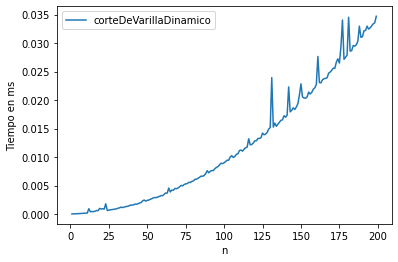

In [11]:
x=[]
y_Dynamic = []

for n in range(1,200):
  b = cutrod_instance_generator(n)
  b.insert(0, 0)
  
  #la función repeat está ejecutando 20 veces corteDeVarillaDinamico con el arreglo b y retorna el mejor tiempo obtenido.
  t_Dynamic = repeat(setup="from __main__ import corteDeVarillaDinamico", stmt=f"corteDeVarillaDinamico({b},{n})", repeat=1, number=10)

  x.append(n)
  y_Dynamic.append(t_Dynamic)

plt.plot(x,y_Dynamic)
plt.legend(["corteDeVarillaDinamico"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Podemos apreciar en el gráfico anterior la forma de la curva construida por Bottom_Up_CutRod, que guarda similitud con una función cuadrática, al igual que la cota superior calculada para el algoritmo en la sección 5 de tiempo de ejecución.

### **6.2. Cantidad de subproblemas en función del largo Bottom_Up_CutRod**

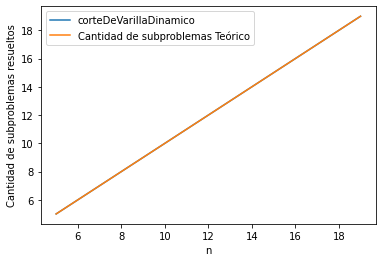

In [9]:
import matplotlib.pyplot as plt

x=[n for n in range(5,20)] 
y_TheoCant=[n for n in range(5,20)] # La cantidad teórica de subproblemas en resolver
y_cant=[]; 

for n in range(5,20):
  a = cutrod_instance_generator(n)
  a.insert(0, 0)
  r, s, cont, comp = corteDeVarillaDinamico(a,n)
  y_cant.append(cont)

plt.plot(x,y_cant)
plt.plot(x,y_TheoCant)
plt.legend(["corteDeVarillaDinamico", "Cantidad de subproblemas Teórico"])

plt.xlabel('n')
plt.ylabel('Cantidad de subproblemas resueltos')
plt.show()

Podemos observar que la predicción de subproblemas que resuelve el algoritmo es correcta, en función del largo de la varilla $n$, el algoritmo resuelve $n$ subproblemas, ya que utiliza la técnica Bottom-up, es decir, los subproblemas son resueltos desde el $1$ hasta $n$.

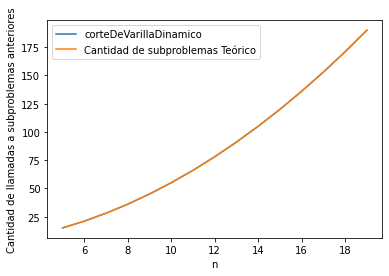

In [10]:
import matplotlib.pyplot as plt

x=[n for n in range(5,20)] 
y_TheoComp=[(n*(n+1))/2 for n in range(5,20)] # La cantidad teórica de comparaciones
y_comp=[];                          # para obtener el máximo beneficio de cada subproblema

for n in range(5,20):
  a = cutrod_instance_generator(n)
  a.insert(0, 0)
  r, s, cont, comp = corteDeVarillaDinamico(a,n)
  y_comp.append(comp)

plt.plot(x,y_comp)
plt.plot(x,y_TheoComp)
plt.legend(["corteDeVarillaDinamico", "Cantidad de subproblemas Teórico"])

plt.xlabel('n')
plt.ylabel('Cantidad de llamadas a subproblemas anteriores')
plt.show()

Por lo que se puede observar, también es correcto afirmar que la cantidad de llamadas a subproblemas anteriores en función de $n$ es $\sum_{i=1}^{n}i$, esto se debe a que el algoritmo en cada iteración $i$ debe utilizar $i$ problemas ya resueltos para obtener la solución (se considera el subproblema 0).